# Diffusion Model

In [2]:
from dataset import Dataset, DatasetDiffusion
import matplotlib.pyplot as plt
import torch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

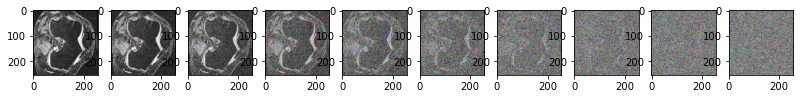

18680


In [3]:
#Create dataset from image folder
ds = DatasetDiffusion("AKOA_Analysis/")

#test dataset plot for 10 selections of timesteps
plt.figure(figsize=(15,15))
plt.axis('off')
num_images = 10
stepsize = int(300/num_images)
for idx in range(0, 300, stepsize):
    plt.subplot(1, num_images+1, int((idx/stepsize) + 1))
    ds.update_timestep(torch.Tensor([idx]).type(torch.int64))
    image, _ = ds.__getitem__(4)
    plt.imshow((image.numpy().T + 1) * 0.5)
plt.show()

print(len(ds))